In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91918\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('flipkart_data.csv') 
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


### Preprocessing and cleaning the reviews

In [4]:
# unique ratings 
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

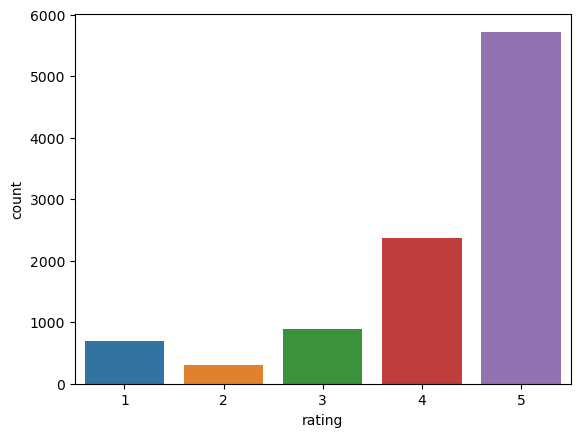

In [6]:
sns.countplot(x='rating',data=data)

To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0), we need to change the rating column into an another column of 0s and 1s category. For that the condition will be like if the rating is less than 4, then it is negative(0) else positive(1). For better understanding, refer the code below.

In [7]:
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 4:
        pos_neg.append(1)
    else:
        pos_neg.append(0)
data['label'] = pos_neg

In [8]:
from tqdm import tqdm 
  
def preprocess_text(text_data): 
    preprocessed_text = [] 
  
    for sentence in tqdm(text_data): 
        # Removing punctuations 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
  
        # Converting lowercase and removing stopwords 
        preprocessed_text.append(' '.join(token.lower() 
                                          for token in nltk.word_tokenize(sentence) 
                                          if token.lower() not in stopwords.words('english'))) 
  
    return preprocessed_text 

In [9]:
preprocessed_review = preprocess_text(data['review'].values) 
data['review'] = preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9976/9976 [02:35<00:00, 64.28it/s]


In [10]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,1
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [11]:
data["label"].value_counts()

1    8091
0    1885
Name: label, dtype: int64

### output:

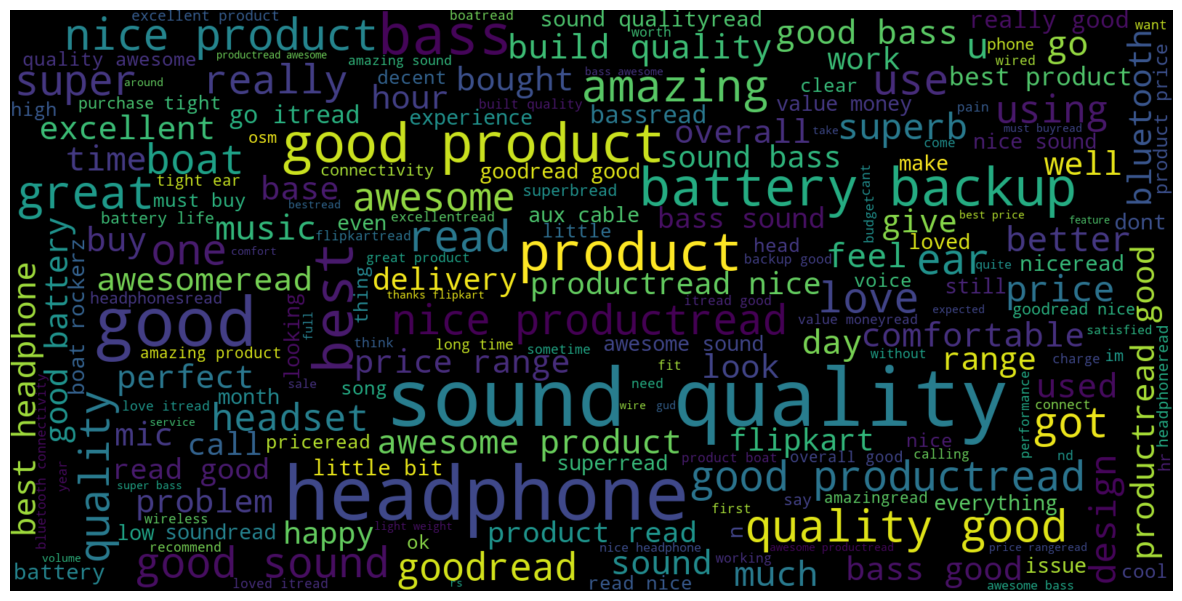

In [12]:
consolidated = ' '.join( 
    word for word in data['review'][data['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

## Converting text into Vectors

In [13]:
cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(data['review'] ).toarray()

In [14]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model training, Evaluation, and Prediction

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], 
                                                    test_size=0.33, 
                                                    stratify=data['label'], 
                                                    random_state = 42)

In [18]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import  accuracy_score

model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 
  
#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))

0.9787520574592249


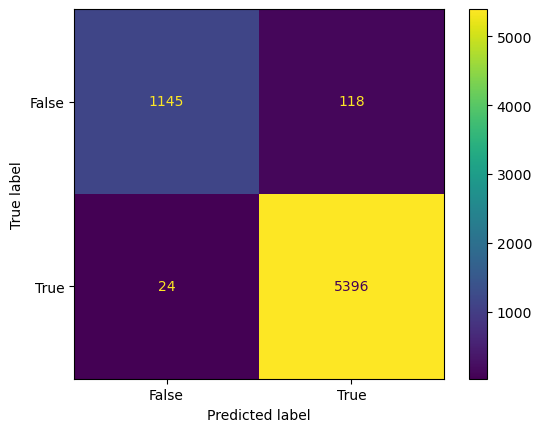

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred) 
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,  
                                            display_labels = [False, True]) 
  
cm_display.plot() 
plt.show()